<a href="https://colab.research.google.com/github/omar99elnemr/Electropi_basic/blob/main/Auto_EDA_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

Define a function to search for a file

In [ ]:
def get_file():
    while True:
        # Prompt the user to enter the file name
        file_name=input('Enter only file name with its extinsion EX:filename.csv => ')
        print("Please wait for the searching result....")

        # Loop through the directory and its subdirectories to find the file
        for root,dirc,files in os.walk('.'):
            # Check if the file name matches any of the files
            if file_name in files:
                # If found, construct the file path
                file_path=os.path.join(root,file_name)
                print("File is found!\n")
                return file_path
        else:
            print('File not found! \nplease make sure there are no typos./nsupported formats .csv .xlx .xlsx .json .sql ')

In [ ]:
def process_file(file_path):
     # Get the file extension
    file_extension=os.path.splitext(file_path)[1] #Also can use string method: '.' + file_path.split('.')[-1]

    # Initialize a DataFrame
    df=None

    # Check the file extension and read the file accordingly
    if file_extension == ".csv":
        df= pd.read_csv(file_path)
    elif file_extension == ".xlsx" or file_extension == ".xlx":
        df= pd.read_excel(file_path)
    elif file_extension == ".json":
        df= pd.read_json(file_path)
    elif file_extension == ".sql":
        df= pd.read_sql(file_path)

    # Check if a DataFrame was successfully created
    if df is not None:
        return df
    else:
        print("Unsupported file format.")
        return -1

In [ ]:
# Define a function to automatically fill missing values in a column
def fill_missing_values(column):
    # Fill missing values with the median of the column
    return column.fillna(column.median)



The following function is the starting menu from which the user make choices to visulize data

In [ ]:
def menu():
    while True:
        print("\nMake you choice....")
        print("1- Visulize single column")
        print("2- Visulize two columns relation")
        print("3- Visulize all columns")
        print("4- Load different file")
        print("5- End")
        try:
            choice=int(input())
        except ValueError as e:
            print(e)
            continue
        if(choice not in [1,2,3,4,5]):
            print("\nWrong input")
            continue
        return choice



The following function visulize all series

In [ ]:
def all_cols(df):
    # Select columns of type 'int64'
    int_cols = df.select_dtypes(include='int64')

    # Select columns of type 'object'
    obj_cols = df.select_dtypes(include='object')

    # Select columns of type 'float64'
    float_cols = df.select_dtypes(include='float64')

    #Heatmap
    sns.heatmap(df.corr(numeric_only=True), annot=True)
    plt.show()

    #Visulize data
    #boxplot
    for col in int_cols:
        plt.boxplot(int_cols[col])
        plt.title(col)
        plt.show()
    #Histograph
    for col in int_cols:
        plt.hist(int_cols[col], edgecolor="w", linewidth=1)
        plt.title(col)
        plt.show()
    #Density plot
    for col in int_cols:
        sns.kdeplot(int_cols[col])
        plt.title(col)
        plt.show()
    #Pie chart
    for col in obj_cols:
        counts= obj_cols[col].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%.2f%%')
        plt.title(col)
        plt.show()
    #Boxplot
    for col in obj_cols:
        plt.boxplot(obj_cols[col])
        plt.title(col)
        plt.show()


Function to create visualizations for a single column. This function takes in a dataframe (df) and the index number of a column (num).

In [ ]:
def single_col(df,num):

#first checks if the data type of the column is numerical (int64 or float64).
#If so, it generates a histogram using plt.hist() and displays it using plt.show().
    if df[columns[num]].dtype == 'int64' or df[columns[num]].dtype == 'float64':
        plt.hist(df[columns[num]], edgecolor='w', linewidth=1)
        plt.title(columns[num])
        plt.grid(True)
        plt.show()

#If the data type of the column is an object,
#it generates a boxplot using plt.boxplot() and pie chart using plt.pie()

    if df[columns[num]].dtype == 'object':
        counts= df[columns[num]].value_counts()
        plt.boxplot(counts)
        plt.title(columns[num])
        plt.show()

    if df[columns[num]].dtype == 'object':
        counts= df[columns[num]].value_counts()
        plt.pie(counts, labels=counts.index, autopct='%.2f%%')
        plt.title(columns[num])
        plt.show()

Function for visulizing two series, This function takes in a dataframe and two column numbers as input. It then creates a scatter plot of the values in the corresponding columns of the dataframe.

In [ ]:
def two_cols(df, num1, num2):
    #Two series relation
    plt.scatter(df[columns[num1]],df[columns[num2]])
    plt.xlabel(columns[num1])
    plt.ylabel(columns[num2])
    plt.title(columns[num1] +' | '+columns[num2])
    plt.show()

Function to print columns names with their indecies for user selection

In [ ]:
def col_num(columns):
    #Vertical space for better visualizing
    while True:
        print()
        #Visualize colummns names and indices
        cols_lst=list(enumerate(columns))
        for col_no, title in cols_lst:
            print(col_no, title)

        try:
            num= int(input("Enter column number: "))
        except ValueError as e:
            print(e,"Enter the number of the required column")
            continue
        if num not in range(len(columns)):
            print("\nWrong input")
            continue
        return num


The main code This code contains a while loop that prompts the user to enter a file path and processes the file.
If the file is not one of the supported file formats (.csv, .xlx, .xlsx, .json, .sql),
an error message is printed and the loop continues. If the file is processed successfully,
the resulting DataFrame is printed.


Enter only file name with its extinsion EX:filename.csv => california_housing_train.csv
Please wait for the searching result....
File is found!


Make you choice....
1- Visulize single column
2- Visulize two columns relation
3- Visulize all columns
4- Load different file
5- End
3


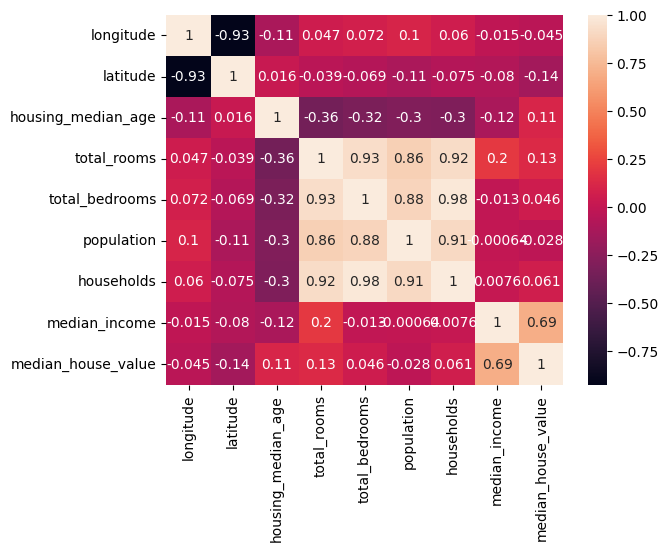


Make you choice....
1- Visulize single column
2- Visulize two columns relation
3- Visulize all columns
4- Load different file
5- End


In [ ]:
while True:

    file_path=get_file()

    df=process_file(file_path)
    if type(df) == type(-1) :
        print('Please, Enter a supported file format .csv .xlx .xlsx .json .sql')
        continue

    df.head(10)
    #Drop duplicates and fill missing values as median
    df=df.drop_duplicates()
    columns=df.columns
    # Apply the function to each column of the DataFrame
    df = df.apply(fill_missing_values)

#The control menu for user where can choose to visualize single or multiple series, load another file or end prompt
    flag=False
    while True:
        choice = menu()
        if choice == 1:
            num = col_num(columns)
            single_col(df,num)
        elif choice == 2:
            num1 = col_num(columns)
            num2 = col_num(columns)
            two_cols(df, num1, num2)
        elif choice == 3:
            all_cols(df)
        elif choice == 4:
            break
        elif choice == 5:
            flag = True
            break
    #If the flag is set, the outer loop breaks and the program ends.
    if flag:
        break